In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Battle Ship

In [2]:
class ship_spot:
    def __init__(self,board_size, name):
        self.board_size = int(board_size)
        self.ships = np.array([['destroyer',2],['cruiser',3 ],['submarine',3] ,['battleship',4],['carrier',5]] )
        self.player = str(name)#'Filipe'
        self.board = self.arrangement()

    def validation(self,x,y,o, i, board):
        size = self.ships[:,1]
        if o == 'v':
            if x+int(size[i]) <= self.board_size:
                board[x:x+int(size[i])   ,   y] = int(size[i])
            else: board[self.board_size-int(size[i]):self.board_size,y] = int(size[i])
        if o == 'h':
            if y+int(size[i]) <= self.board_size :
                board[x, y:y+int(size[i])] = int(size[i])
            else: board[x, self.board_size-int(size[i]):self.board_size] = int(size[i])
        return #board
    
    def arrangement(self):
        board_ship = np.zeros((self.board_size,self.board_size))
        for i in range(5):
            ship, size = self.ships[i,0],int(self.ships[i,1])
            valid = True
            while valid:
                try:
                    y = int(input("{} pick(ed) the y's( line ) for the {} with lenght {}; y=".format(self.player,ship, size)))
                    x = int(input("{} pick(ed) the x's(column) for the {} with lenght {}; x=".format(self.player,ship, size)))
                    if x < self.board_size and y < self.board_size:
                        valid = False
                except:
                    print("choose a number between 0 and {}".format(self.board_size))
                    valid = True
            val = True
            while val:
                try:
                    o = input("choose v or h refered to vertical or horizontal: ")
                    if o == 'v' or o == 'h':
                        val = False
                except:
                    print('You should choose between v or h')
                    val = True
            self.validation(x,y,o,i,board_ship)
        return board_ship
#ship_spot(10, 'Filipe').board

In [3]:
class player():
    """This class gives the information about the player's board-ships and the board's shot control"""
    def __init__(self, name, board_size):
        self.player = name
        self.board_size = board_size
        self.Heris_board_shotted = np.zeros((board_size,board_size))
        self.my_board = ship_spot(board_size, name).board
        
    def board_ship(self):
        return self.my_board
    
    def board_shot(self): 
        return self.Heris_board_shotted
        
    def __str__(self):
        return 'Player: {}; Size of the board: {} by {}'.format(self.player
                ,len(self.my_board),len(self.my_board))


Amary pick(ed) the y's( line ) for the destroyer with lenght 2; y=0
Amary pick(ed) the x's(column) for the destroyer with lenght 2; x=0
choose v or h refered to vertical or horizontal: v
Amary pick(ed) the y's( line ) for the cruiser with lenght 3; y=2
Amary pick(ed) the x's(column) for the cruiser with lenght 3; x=2
choose v or h refered to vertical or horizontal: v
Amary pick(ed) the y's( line ) for the submarine with lenght 3; y=4
Amary pick(ed) the x's(column) for the submarine with lenght 3; x=4
choose v or h refered to vertical or horizontal: v
Amary pick(ed) the y's( line ) for the battleship with lenght 4; y=6
Amary pick(ed) the x's(column) for the battleship with lenght 4; x=6
choose v or h refered to vertical or horizontal: v
Amary pick(ed) the y's( line ) for the carrier with lenght 5; y=8
Amary pick(ed) the x's(column) for the carrier with lenght 5; x=8
choose v or h refered to vertical or horizontal: v
Bacuara pick(ed) the y's( line ) for the destroyer with lenght 2; y=9
B

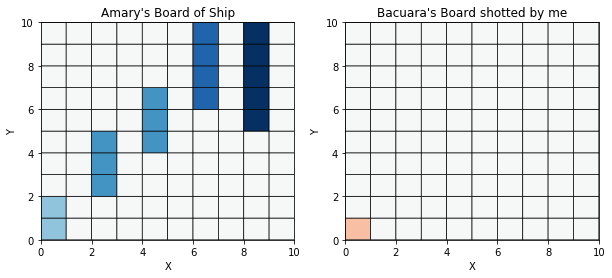

Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 0
Round:  1 . You got one


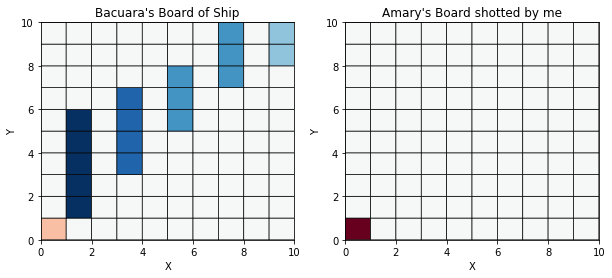

Amary, get x for to shoot: 5
Amary, get y for to shoot: 5
Round:  2 . You got one


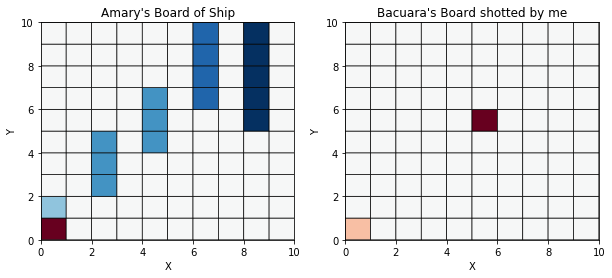

Bacuara, get x for to shoot: 5
Bacuara, get y for to shoot: 5
Round:  2 . That was close


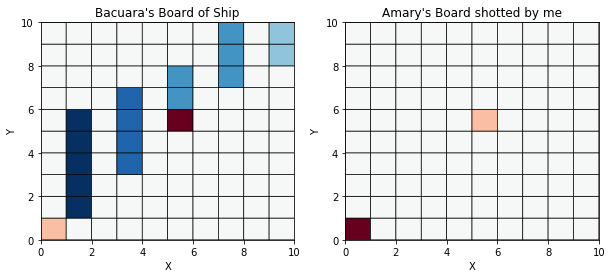

Amary, get x for to shoot: 6
Amary, get y for to shoot: 6
Round:  3 . That was close


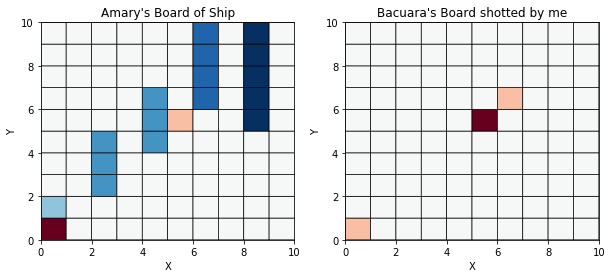

Bacuara, get x for to shoot: 6
Bacuara, get y for to shoot: 6
Round:  3 . You got one


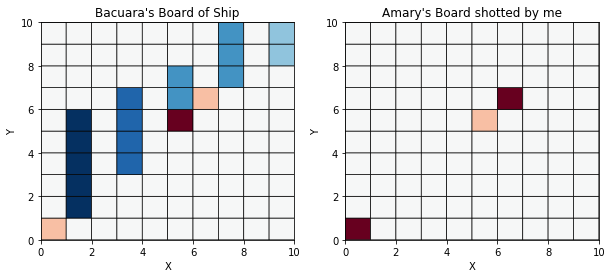

Amary, get x for to shoot: 8
Amary, get y for to shoot: 9
Round:  4 . You got one


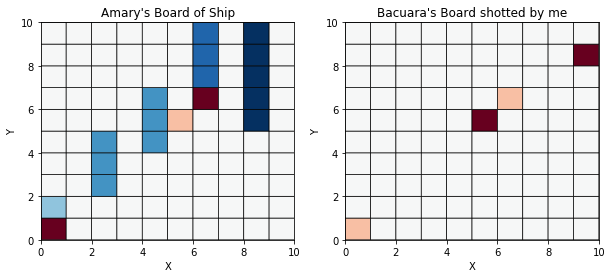

Bacuara, get x for to shoot: 8
Bacuara, get y for to shoot: 9
Round:  4 . That was close


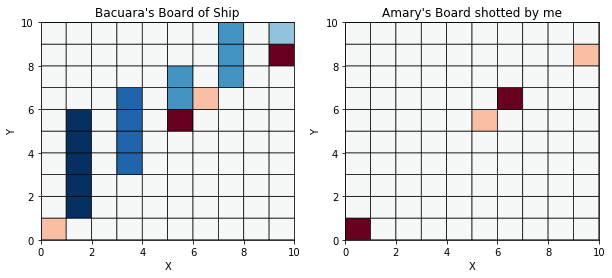

Amary, get x for to shoot: 9
Amary, get y for to shoot: 9
Round:  5 . You got one


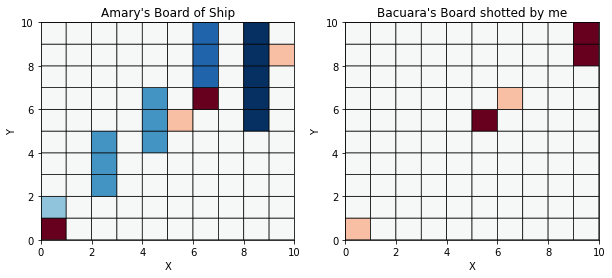

Bacuara, get x for to shoot: 9
Bacuara, get y for to shoot: 9
Round:  5 . That was close


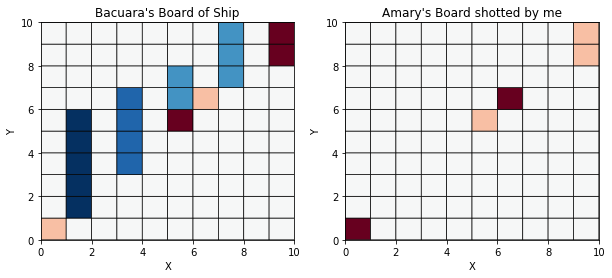

Amary, get x for to shoot: 9
Amary, get y for to shoot: 7
Round:  6 . You got one


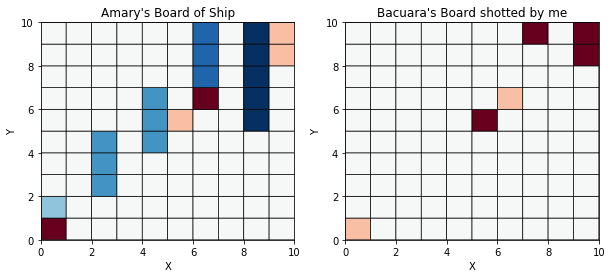

Bacuara, get x for to shoot: 9
Bacuara, get y for to shoot: 7
Round:  6 . That was close


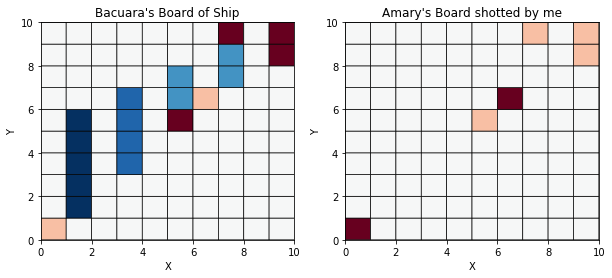

Amary, get x for to shoot: 8
Amary, get y for to shoot: 7
Round:  7 . You got one


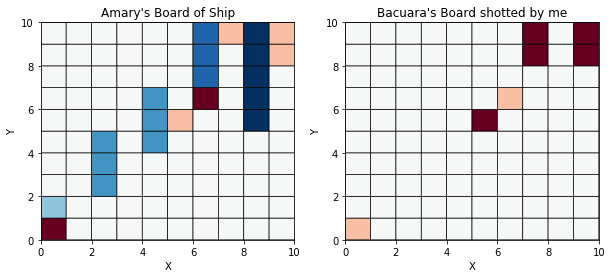

Bacuara, get x for to shoot: 8
Bacuara, get y for to shoot: 7
Round:  7 . That was close


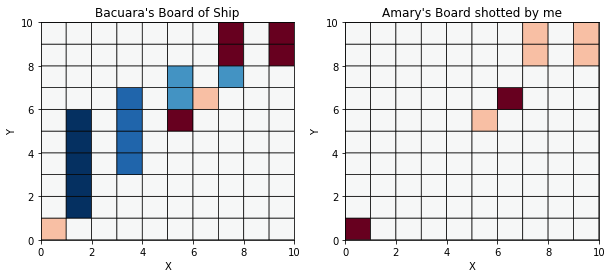

Amary, get x for to shoot: 7
Amary, get y for to shoot: 7
Round:  8 . You got one


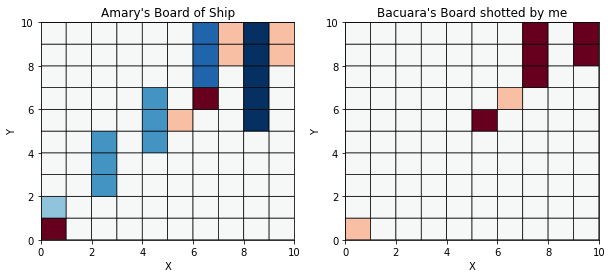

Bacuara, get x for to shoot: 7
Bacuara, get y for to shoot: 7
Round:  8 . That was close


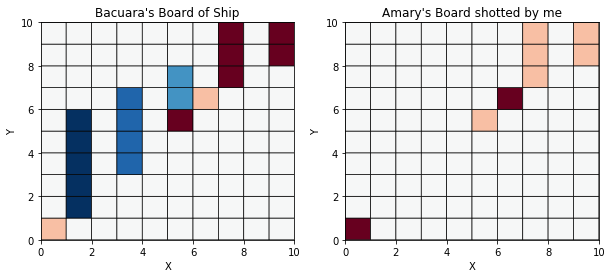

Amary, get x for to shoot: 6
Amary, get y for to shoot: 5
Round:  9 . You got one


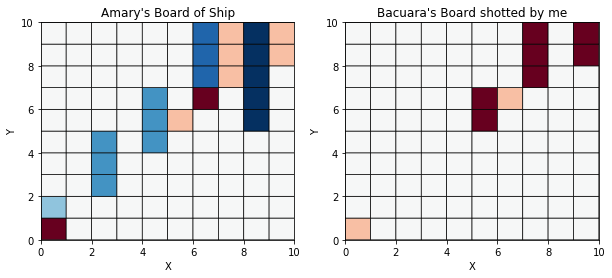

Bacuara, get x for to shoot: 6
Bacuara, get y for to shoot: 5
Round:  9 . That was close


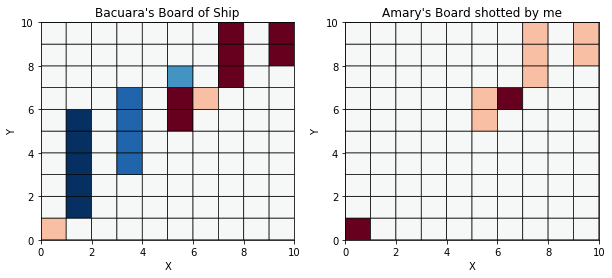

Amary, get x for to shoot: 7
Amary, get y for to shoot: 5
Round:  10 . You got one


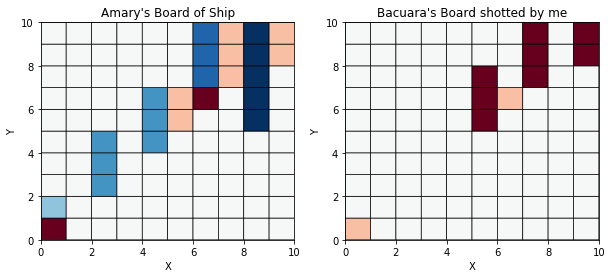

Bacuara, get x for to shoot: 7
Bacuara, get y for to shoot: 5
Round:  10 . That was close


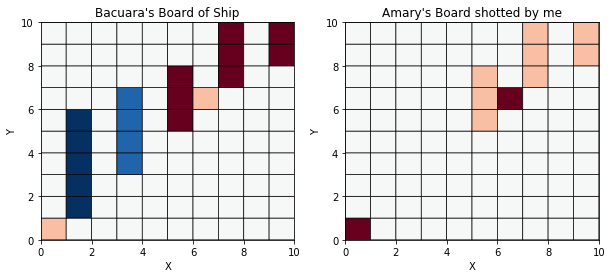

Amary, get x for to shoot: 3
Amary, get y for to shoot: 3
Round:  11 . You got one


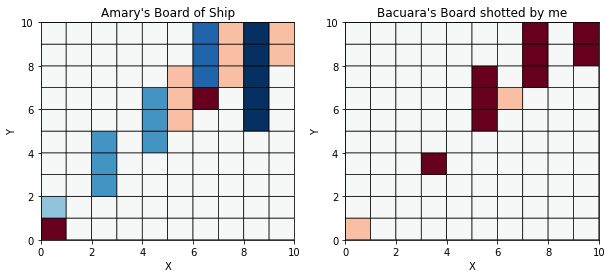

Bacuara, get x for to shoot: 3
Bacuara, get y for to shoot: 3
Round:  11 . That was close


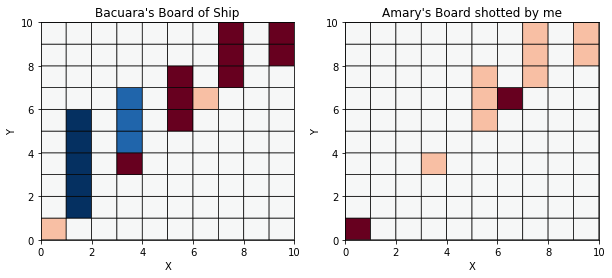

Amary, get x for to shoot: 4
Amary, get y for to shoot: 3
Round:  12 . You got one


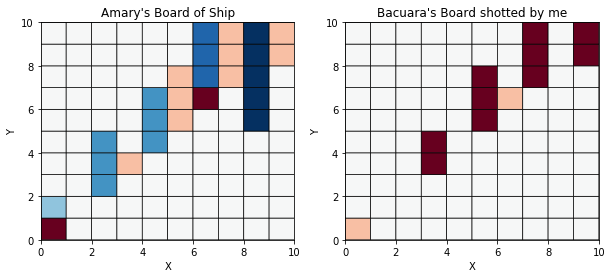

Bacuara, get x for to shoot: 4
Bacuara, get y for to shoot: 3
Round:  12 . That was close


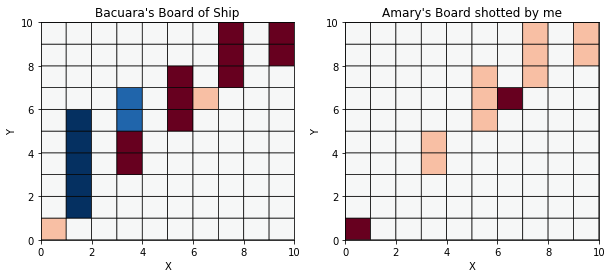

Amary, get x for to shoot: 5
Amary, get y for to shoot: 3
Round:  13 . You got one


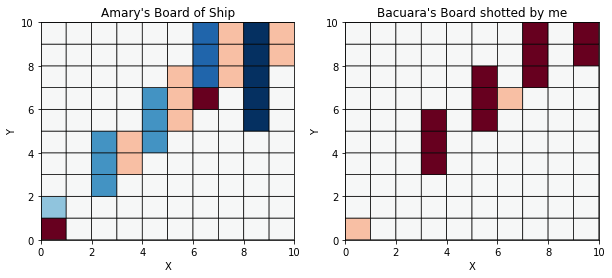

Bacuara, get x for to shoot: 5
Bacuara, get y for to shoot: 3
Round:  13 . That was close


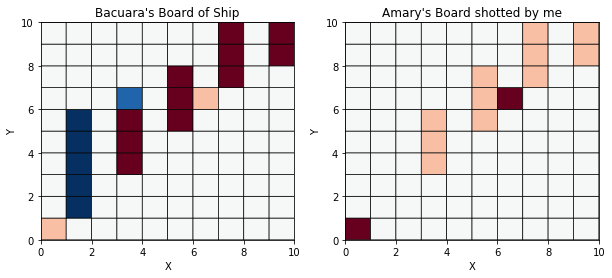

Amary, get x for to shoot: 6
Amary, get y for to shoot: 3
Round:  14 . You got one


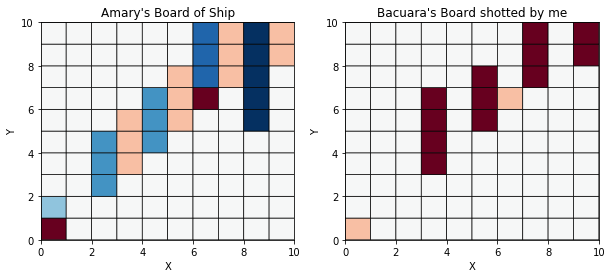

Bacuara, get x for to shoot: 6
Bacuara, get y for to shoot: 3
Round:  14 . That was close


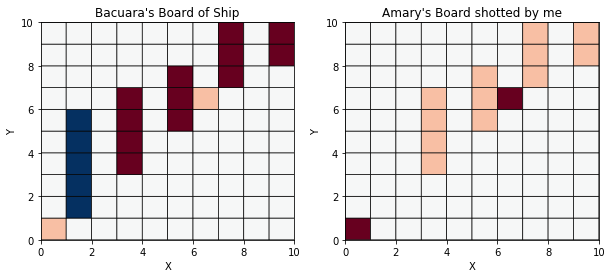

Amary, get x for to shoot: 1
Amary, get y for to shoot: 1
Round:  15 . You got one


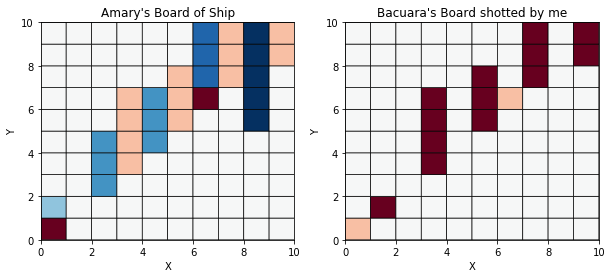

Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 1
Round:  15 . That was close


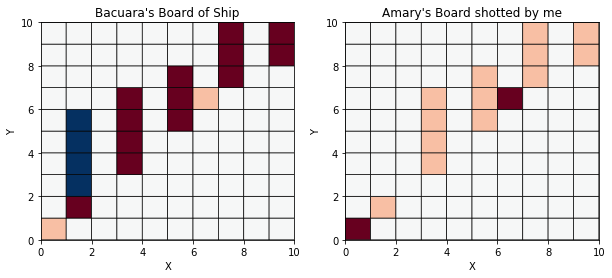

Amary, get x for to shoot: 2
Amary, get y for to shoot: 1
Round:  16 . You got one


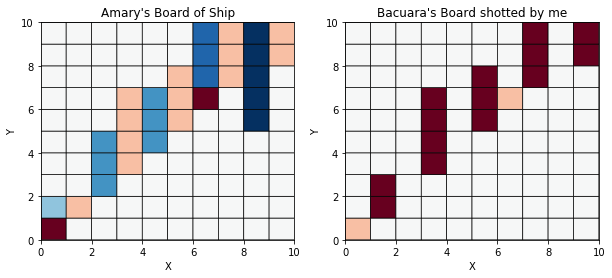

Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 1
Round:  16 . That was close


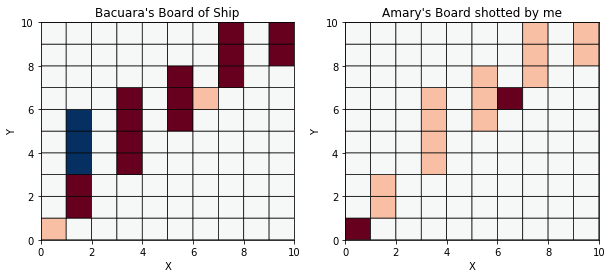

Amary, get x for to shoot: 3
Amary, get y for to shoot: 1
Round:  17 . You got one


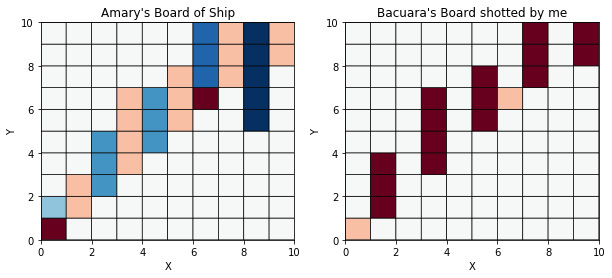

Bacuara, get x for to shoot: 3
Bacuara, get y for to shoot: 1
Round:  17 . That was close


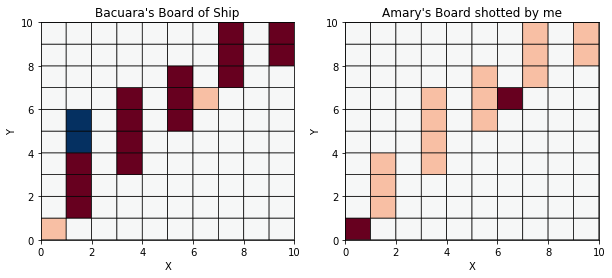

Amary, get x for to shoot: 4
Amary, get y for to shoot: 1
Round:  18 . You got one


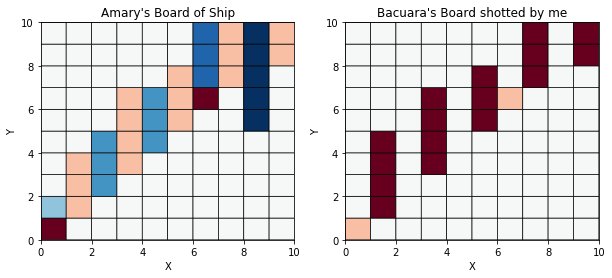

Bacuara, get x for to shoot: 4
Bacuara, get y for to shoot: 1
Round:  18 . That was close


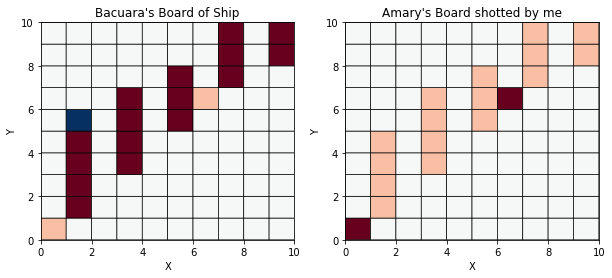

Amary, get x for to shoot: 5
Amary, get y for to shoot: 1
Round:  19 . You got one


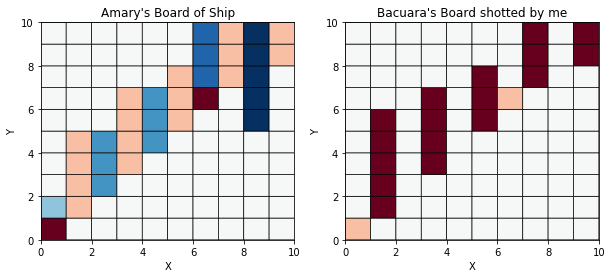

Bacuara, get x for to shoot: 5
Bacuara, get y for to shoot: 1
Round:  19 . That was close


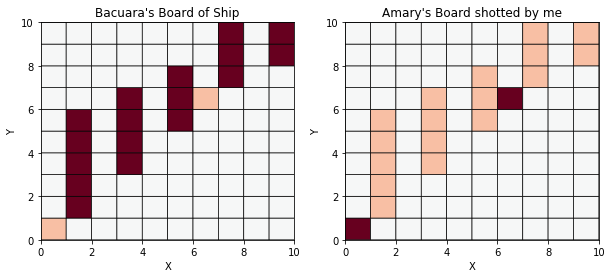

'Amary won the game'

In [4]:
class main:
    """The main class takecare about the view of the game, the round step and the 
    interaction between the players"""
    def __init__(self, bs):
        self.p1 = player('Amary'  ,bs)
        self.p2 = player('Bacuara',bs)
        
    def plot(self , board_ship , board_shot , player_ship , player_shot ):
        """Here you going to gettin with the p(n).board_ship(), p(n).board_shot(), 
        with the p(n).player and with p(m).player. Where n means the player attack and m the enemy"""
        f = plt.figure(figsize=(10,4))
        ax1,ax2 = f.add_subplot(121),f.add_subplot(122)
        ax1.pcolor(board_ship ,edgecolors='k', cmap="RdBu", vmin=-5,vmax=5, linewidths=0.7)
        ax2.pcolor(board_shot ,edgecolors='k', cmap="RdBu", vmin=-5,vmax=5, linewidths=0.7)
        ax1.set_xlabel('X'),ax1.set_ylabel('Y')
        ax2.set_xlabel('X'),ax2.set_ylabel('Y')
        ax1.set_title(player_ship+"'s Board of Ship")
        ax2.set_title(player_shot+"'s Board shotted by me")
        plt.show()
        return
    
    def round_n(self, shooter, ships_enemy, targeted, player,n):
        """The round look at if you shotted a ship or the sea and gives 
        the belge color for wrong shot and red for the right """
        count, valid = 0, True
        
        while valid:
            try:
                x,y = int(input(player+', get x for to shoot: ')), int(input(player+', get y for to shoot: '))
                if x < self.p1.board_size and y < self.p1.board_size:
                    valid = False
            except:
                print("choose a number between 0 and {}".format(self.p1.board_size-1))
                valid = True
        if ships_enemy[x,y] == 0:
            ships_enemy[x,y] = -1.5
            targeted[x,y] = -1.5
            print('Round: ',n,'. That was close')
        elif ships_enemy[x,y] > 0 :
            ships_enemy[x,y] = -10
            targeted[x,y] = -10
            print('Round: ',n,'. You got one')
            count = 1
        return shooter,targeted, count
        
    def play(self):
        """Here we have the interaction between the 2 instance created in te __init__"""
        times = 1
        count1, count2 = 0,0
        while count1 < 17 and count2 < 17:
            A=self.round_n(self.p1.board_ship() ,self.p2.board_ship(), self.p1.board_shot(), self.p1.player,times)
            self.plot( self.p1.board_ship() , self.p1.board_shot(), self.p1.player,self.p2.player )
            
            B=self.round_n(self.p2.board_ship(),self.p1.board_ship() , self.p2.board_shot(), self.p2.player,times)
            self.plot( self.p2.board_ship() , self.p2.board_shot(),self.p2.player,self.p1.player )
            
            count1 += A[2]
            count2 += B[2]
            times  += 1
            
        if count1 > count2:
            win = self.p1.player+' won the game'
        else: win = self.p2.player+' won the game'
        
        return win
    
main(10).play()3